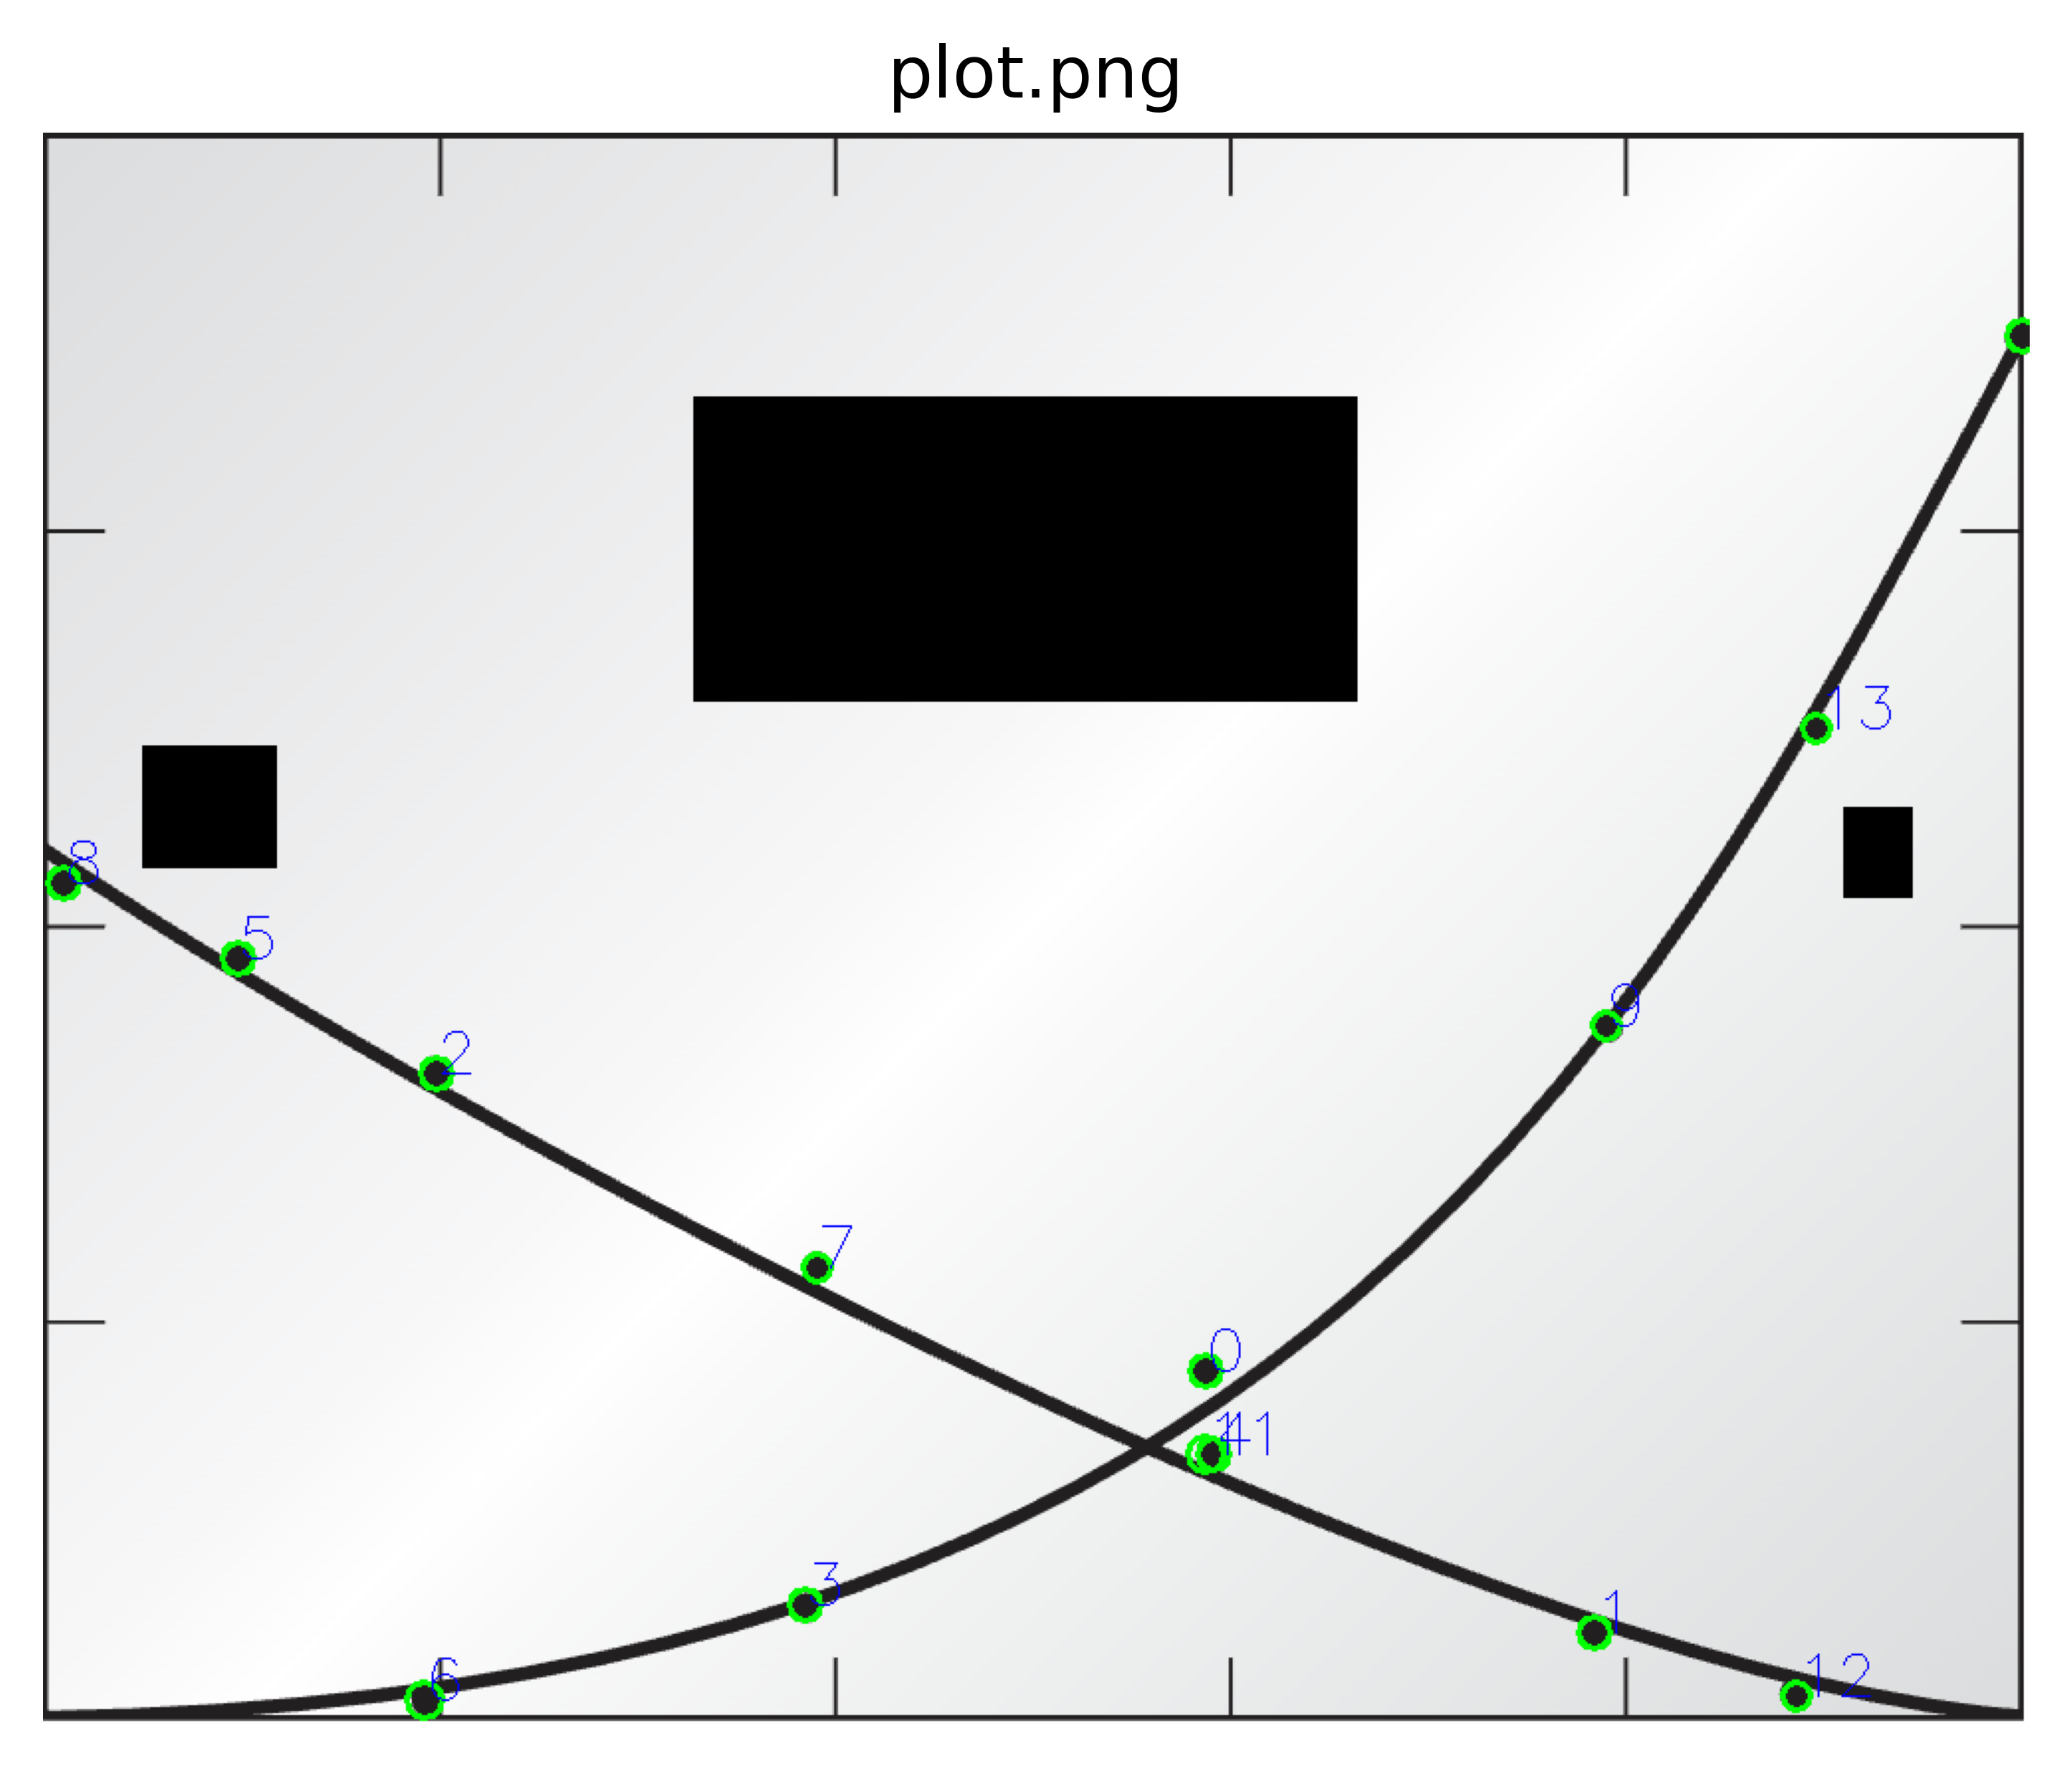

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from glob import glob

file = glob("plo*.png")[0]
img = cv2.imread(file)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1, minDist=3,
                            param1=200, param2=12, minRadius=1, maxRadius=10)

edges = cv2.Canny(gray, 50, 150, apertureSize=3) 

xcoords, ycoords = [],[]
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i, circle in enumerate(circles[0, :]):
        x, y = circle[0], circle[1]
        cv2.circle(img, (x, y), circle[2], (0, 255, 0), 2)
        cv2.putText(img, f"{i}", (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0))
        xcoords.append(x)
        ycoords.append(y)

xcoords, ycoords = np.array(xcoords), np.array(ycoords)

xcoords = xcoords * (1.0/802)
ycoords = ycoords * (0.8/1002)

fig,ax=plt.subplots(dpi=600)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(file)
plt.axis('off')
plt.show()

In [21]:
import pandas as pd

df = pd.DataFrame(xcoords, ycoords)
df

,0
0.498204,0.730673
0.603593,0.975062
0.378443,0.246883
0.592415,0.478803
0.531737,0.735661
0.332136,0.122195
0.630739,0.239401
0.456687,0.486284
0.301796,0.012469
0.359281,0.982544
